# The Sparks Foundation -Data Science and Business Anaylytics¶

## Task-4: Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’¶

### As a security/defense analyst, try to find out the hot zone of terrorism.



In [83]:

#import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
from IPython.display import clear_output
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [10]:
df=pd.read_csv('globalterrorismdb_0718dist.csv',encoding ='ISO-8859-1', low_memory=False)
df.head()


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [12]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [14]:
df.rename(columns={'eventid':'Eventid', 'iyear':'Year', 'imonth':'Month', 'iday':'Day', 
                          'extended':'Extended', 'resolution':'Resolution',  'attacktype1_txt':'Attacktype', 
                          'country_txt':'Country', 'region_txt':'Region', 'provstate': 'Provstate', 
                          'city':'City', 'crit1':'Crit1', 'crit2':'Crit2', 
                          'crit3':'Crit3', 'multiple':'Multiple', 'success':'Success', 'suicide':'Suicide', 
                          'targtype1_txt':'Targtype', 'natlty1_txt':'Natlty1', 'natlty2_txt':'Natlty2', 
                          'natlty3_txt':'Natlty3', 'gname':'Gname', 'gname2':'Gname2', 'gname3':'Gname3', 
                          'guncertain1':'Guncertain1', 'guncertain2':'Guncertain2', 'guncertain3':'Guncertain3', 
                          'claimed':'Claimed', 'weaptype1_txt':'Weaptype', 'weapsubtype1_txt':'Weapsubtype', 
                          'nkill':'Nkill', 'nkillus':'Nkillus', 'nkillter':'Nkillter', 'nwound':'Nwound', 
                          'nwoundus':'Nwoundus', 'nwoundte':'Nwoundter', 'property':'Property', 
                          'propextent_txt':'Propextent', 'propvalue':'Propvalue', 'ishostkid':'Ishostkid', 
                          'nhostkid':'Nhostkid', 'nhostkidus':'Nhostkidus', 'ransom':'Ransom', 
                          'hostkidoutcome':'Hostkidoutcome', 'nreleased':'Nreleased'},inplace=True)

In [15]:
df.head()

,Eventid,Year,Month,Day,approxdate,Extended,Resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [16]:
data = df[['Eventid', 'Year','Country', 'Region', 'Provstate', 'City', 'Crit1', 'Crit2', 'Crit3', 
                  'Success', 'Suicide', 'Attacktype', 'Targtype', 'Natlty1','Gname', 'Guncertain1', 
                  'Claimed', 'Weaptype', 'Nkill','Nwound']]

In [17]:
data.head()

,Eventid,Year,Country,Region,Provstate,City,Crit1,Crit2,Crit3,Success,Suicide,Attacktype,Targtype,Natlty1,Gname,Guncertain1,Claimed,Weaptype,Nkill,Nwound
0,197000000001,1970,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,1,1,1,1,0,Assassination,Private Citizens & Property,Dominican Republic,MANO-D,0.0,NaN,Unknown,1.0,0.0
1,197000000002,1970,Mexico,North America,Federal,Mexico city,1,1,1,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),Belgium,23rd of September Communist League,0.0,NaN,Unknown,0.0,0.0
2,197001000001,1970,Philippines,Southeast Asia,Tarlac,Unknown,1,1,1,1,0,Assassination,Journalists & Media,United States,Unknown,0.0,NaN,Unknown,1.0,0.0
3,197001000002,1970,Greece,Western Europe,Attica,Athens,1,1,1,1,0,Bombing/Explosion,Government (Diplomatic),United States,Unknown,0.0,NaN,Explosives,NaN,NaN
4,197001000003,1970,Japan,East Asia,Fukouka,Fukouka,1,1,1,1,0,Facility/Infrastructure Attack,Government (Diplomatic),United States,Unknown,0.0,NaN,Incendiary,NaN,NaN


In [18]:
df['Claimed']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
181686    1.0
181687    0.0
181688    0.0
181689    0.0
181690    0.0
Name: Claimed, Length: 181691, dtype: float64

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Eventid      181691 non-null  int64  
 1   Year         181691 non-null  int64  
 2   Country      181691 non-null  object 
 3   Region       181691 non-null  object 
 4   Provstate    181270 non-null  object 
 5   City         181257 non-null  object 
 6   Crit1        181691 non-null  int64  
 7   Crit2        181691 non-null  int64  
 8   Crit3        181691 non-null  int64  
 9   Success      181691 non-null  int64  
 10  Suicide      181691 non-null  int64  
 11  Attacktype   181691 non-null  object 
 12  Targtype     181691 non-null  object 
 13  Natlty1      180132 non-null  object 
 14  Gname        181691 non-null  object 
 15  Guncertain1  181311 non-null  float64
 16  Claimed      115571 non-null  float64
 17  Weaptype     181691 non-null  object 
 18  Nkill        171378 non-

In [32]:
print('Country with the highest number of attacks is :',data['Country'].value_counts().index[0])


SyntaxError: unexpected EOF while parsing (<ipython-input-32-e43cfdb9d79c>, line 2)

In [34]:
print('Region with the highest number of attacks is :',data['Region'].value_counts().index[0])


Region with the highest number of attacks is : Middle East & North Africa


In [35]:
print('Maximum number of people were killed by a single terrorist attack are:',data['Nkill'].max())

Maximum number of people were killed by a single terrorist attack are: 1570.0


In [40]:
data['Damage']=df['Nkill']+df['Nwound']

In [41]:
data.head()

,Eventid,Year,Country,Region,Provstate,City,Crit1,Crit2,Crit3,Success,...,Attacktype,Targtype,Natlty1,Gname,Guncertain1,Claimed,Weaptype,Nkill,Nwound,Damage
0,197000000001,1970,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,1,1,1,1,...,Assassination,Private Citizens & Property,Dominican Republic,MANO-D,0.0,NaN,Unknown,1.0,0.0,1.0
1,197000000002,1970,Mexico,North America,Federal,Mexico city,1,1,1,1,...,Hostage Taking (Kidnapping),Government (Diplomatic),Belgium,23rd of September Communist League,0.0,NaN,Unknown,0.0,0.0,0.0
2,197001000001,1970,Philippines,Southeast Asia,Tarlac,Unknown,1,1,1,1,...,Assassination,Journalists & Media,United States,Unknown,0.0,NaN,Unknown,1.0,0.0,1.0
3,197001000002,1970,Greece,Western Europe,Attica,Athens,1,1,1,1,...,Bombing/Explosion,Government (Diplomatic),United States,Unknown,0.0,NaN,Explosives,NaN,NaN,NaN
4,197001000003,1970,Japan,East Asia,Fukouka,Fukouka,1,1,1,1,...,Facility/Infrastructure Attack,Government (Diplomatic),United States,Unknown,0.0,NaN,Incendiary,NaN,NaN,NaN


In [42]:
#Change some long words inside the dataset
data['Country'] = data['Country'].replace('South Vietnam','Vietnam', regex=True)
data['Weaptype'] = data['Weaptype'].replace('Vehicle .*','Vehicle', regex=True)
data['Attacktype'] = data['Attacktype'].replace('Hostage Taking .*','Hostage Taking', regex=True)

In [45]:
#analyzing terrorist attack types and damages

x=data['Attacktype'].value_counts().tolist()

In [49]:
attacks_filtered=data['Attacktype'].apply(lambda x: x if x in ['Bombing/Explosion','Armed Assault','Assassination',
                                                            'Hostage Taking',
                                                            'Facility/Infrastructure Attack'] else 'Others')
attacks_filtered

0                          Assassination
1                         Hostage Taking
2                          Assassination
3                      Bombing/Explosion
4         Facility/Infrastructure Attack
                       ...              
181686                     Armed Assault
181687                 Bombing/Explosion
181688    Facility/Infrastructure Attack
181689                 Bombing/Explosion
181690                 Bombing/Explosion
Name: Attacktype, Length: 181691, dtype: object

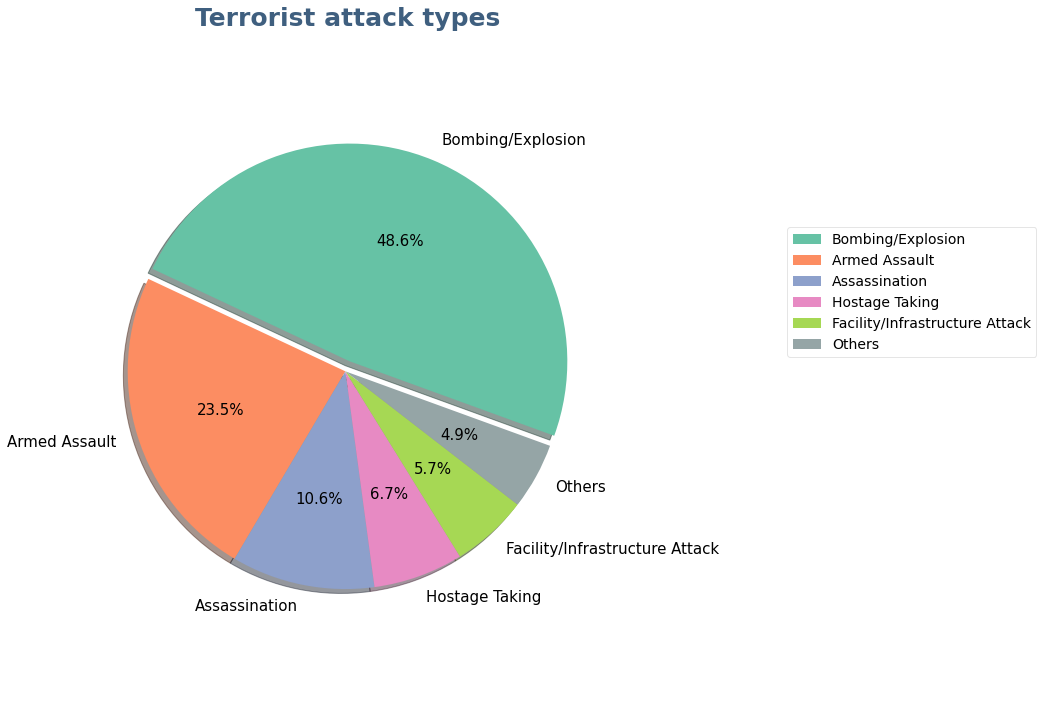

In [87]:
atk_filtered =data['Attacktype'].apply(lambda x: x if x in ['Bombing/Explosion','Armed Assault','Assassination',
                                                            'Hostage Taking',
                                                            'Facility/Infrastructure Attack'] else 'Others')
attack_type = atk_filtered.value_counts().tolist()

# Pie chart of Terrorist attack types
labels = ['Bombing/Explosion','Armed Assault','Assassination',
          'Hostage Taking','Facility/Infrastructure Attack','Others']

sizes = []

for i in attack_type:
    percent = i*100/len(data['Attacktype'])
    sizes.append(percent)

fig, ax = plt.subplots(figsize=(10,10))
patches, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%',
        startangle = -20, shadow = True,
        explode = (0.05, 0, 0, 0, 0, 0),
        colors = sns.color_palette("Set2", 8)[:5]+[(0.5843137254901961, 0.6470588235294118, 0.6509803921568628)],
        textprops={'fontsize':15,'weight':'light','color':'k'})

ax.axis('equal')
plt.title('Terrorist attack types', fontsize= 25, pad= -70, weight ='bold', 
             color = sns.cubehelix_palette(8, start=.5, rot=-.75)[-3]) #pad change the distance from title to graph
plt.tight_layout()
ax.legend(loc='lower right',framealpha = 0.5,bbox_to_anchor=(1.8,0.5,0.1,1), prop={'size': 14})
fig.show()




    

In [105]:
names = ['Bombing/Explosion','Armed Assault','Assassination','Hostage Taking','Facility/Infrastructure Attack']
color_cat = sns.color_palette("Set2", 8)[:5]
color_cat_dict = dict(zip(names, color_cat))

table=data[['Attacktype','Damage']].groupby('Attacktype',as_index = False).sum().sort_values(by='Damage',ascending=False)
table = table.reset_index()

table

,index,Attacktype,Damage
0,2,Bombing/Explosion,514233.0
1,0,Armed Assault,212386.0
2,7,Unknown,39606.0
3,1,Assassination,37209.0
4,5,Hostage Taking,27732.0
5,4,Hijacking,20642.0
6,6,Unarmed Assault,14791.0
7,3,Facility/Infrastructure Attack,6293.0


<BarContainer object of 8 artists>

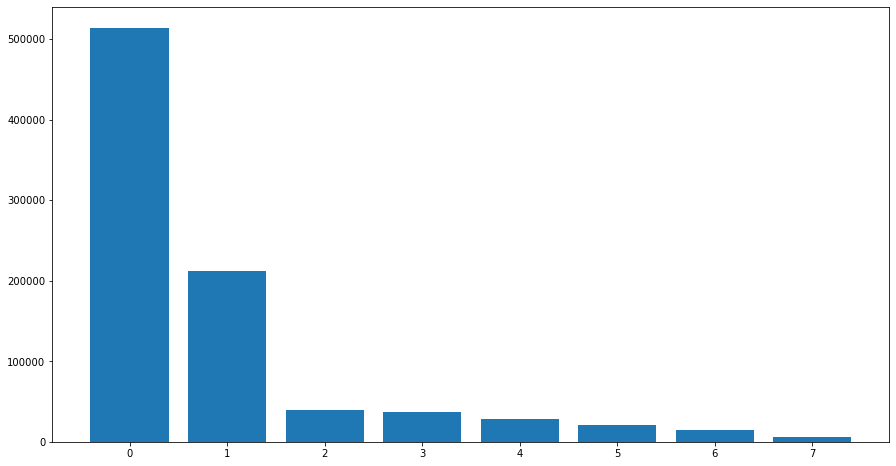

In [108]:
labels=table["Attacktype"].tolist()
labels
x = np.arange(len(labels)) 

dmg=table["Damage"].tolist()

fig, ax1 = plt.subplots(figsize=(15,8))

ax1.bar(x,dmg)

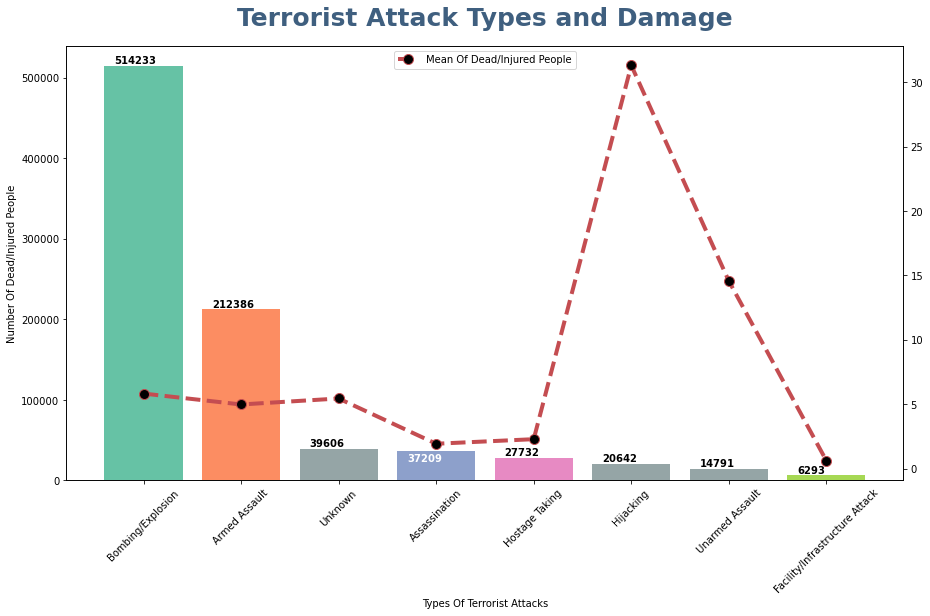

In [109]:
labels = table_1['Attacktype'].tolist()
x = np.arange(len(labels)) 
dmg = table_1['Damage'].tolist()

gray = (0.5843137254901961, 0.6470588235294118, 0.6509803921568628)
color_list = [color_cat_dict[ter_type] if ter_type in color_cat_dict.keys() else gray for ter_type in labels]

d_rate = table_1["Damage_rate"].tolist()
fig, ax1 = plt.subplots(figsize=(15,8))

# Bar chart
ax1.bar(labels, dmg,
       color = color_list,
       align='center')

# Number in bar chart
for i,v in enumerate(dmg):
    ax1.text(i-0.3, v-13000 if v==37209 else v+3000, str(round(v)), 
             color='w' if v==37209 else 'k',
             fontweight='bold')


# Insert a second plot -line plot
ax2 = ax1.twinx()
ax2.plot(labels, d_rate, linestyle='--', linewidth =4, marker ='o', 
         markerfacecolor='black', markersize =10,
         label='Mean Of Dead/Injured People',
        color = '#C44D51')

plt.title('Terrorist Attack Types and Damage', fontsize= 25, pad= 20, weight ='bold', 
             color = sns.cubehelix_palette(8, start=.5, rot=-.75)[-3]) 

ax1.set(xlabel='Types Of Terrorist Attacks', ylabel='Number Of Dead/Injured People')

ax1.set_xticklabels(labels, rotation=45)

plt.yticks(fontsize=10)

ax2.legend(loc='upper center') 
fig.show()


In [110]:
#bombing explosion

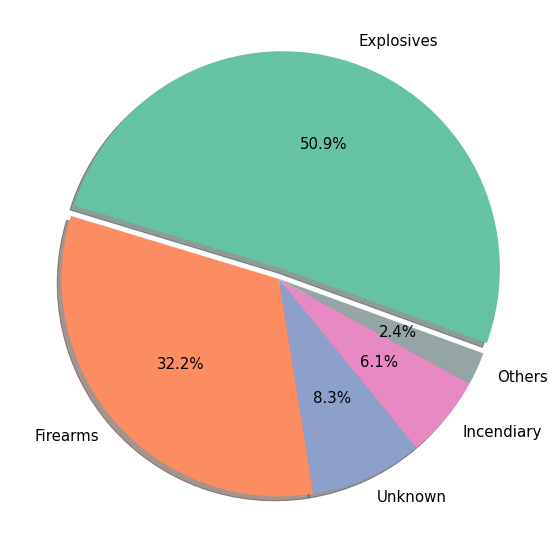

In [127]:
weapon_type=data['Weaptype'].apply(lambda x: x if x in ['Explosives','Incendiary','Firearms','Unknown']else 'Otthers')
weapen_list=weapon_type.value_counts().tolist()
weap_labels = ['Explosives','Firearms','Unknown','Incendiary','Others']

size=[]
for i in weapen_list:
    percent=i*100/len(data['Weaptype'])
    size.append(percent)
    

    
fig, ax = plt.subplots(figsize=(10,10))
patches, texts, autotexts = ax.pie(size, labels=weap_labels, autopct='%1.1f%%',
        startangle = -20, shadow = True,
        explode = (0.05, 0, 0, 0, 0),
        colors = sns.color_palette("Set2", 8)[:4:1]+
                                   [(0.5843137254901961, 0.6470588235294118, 0.6509803921568628)],
        textprops={'fontsize':15,'weight':'light','color':'k'})

In [129]:
table_2=df[['Weaptype','Damage']].groupby('Weaptype',as_index=False).sum().sort_values(by='Damage',ascending=False)
table_2
table_2.reset_index()

,index,Weaptype,Damage
0,2,Explosives,537788.0
1,4,Firearms,225473.0
2,10,Unknown,50167.0
3,11,Vehicle (not to include vehicle-borne explosiv...,20297.0
4,6,Melee,14489.0
5,1,Chemical,14377.0
6,5,Incendiary,8898.0
7,0,Biological,814.0
8,9,Sabotage Equipment,357.0
9,7,Other,225.0


In [141]:
table_2=df[['Weaptype','Damage']].groupby('Weaptype',as_index=False).sum().sort_values(by='Damage',ascending=False)
table_2
table_2.reset_index()
df_count=data['Weaptype'].value_counts()
#df_count = df_count.reindex(table_2['Weaptype'].values)
table_2['WeapCount']=df_count.values
table_2['Weap/Damage']=table_2["Damage"]/table_2["WeapCount"]
table_2


,Weaptype,Damage,WeapCount,Weap/Damage
2,Explosives,537788.0,92426.0,5.818579
4,Firearms,225473.0,58524.0,3.852659
10,Unknown,50167.0,15157.0,3.309824
11,Vehicle (not to include vehicle-borne explosiv...,20297.0,NaN,NaN
6,Melee,14489.0,3655.0,3.964159
1,Chemical,14377.0,321.0,44.788162
5,Incendiary,8898.0,11135.0,0.799102
0,Biological,814.0,35.0,23.257143
9,Sabotage Equipment,357.0,141.0,2.531915
7,Other,225.0,114.0,1.973684


In [143]:
weap_labes=table_2['Weaptype'].tolist()
y = np.arange(len(weap_labels)) 
y

array([0, 1, 2, 3, 4])

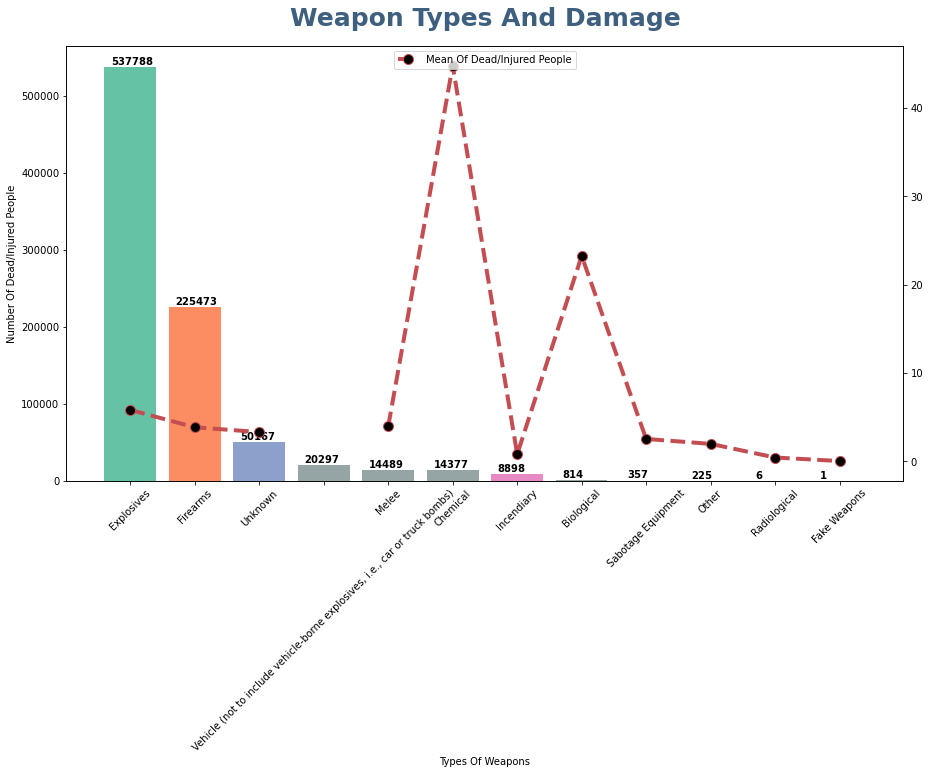

In [145]:
weap_labels = table_2['Weaptype'].tolist()
y = np.arange(len(weap_labels)) 
weap_dmg = table_2['Damage'].tolist()

w_cat = ['Explosives','Firearms','Unknown','Incendiary']
w_color_cat = sns.color_palette("Set2", 8)[:4:1]
w_color_cat_dict = dict(zip(w_cat, w_color_cat))

w_gray = (0.5843137254901961, 0.6470588235294118, 0.6509803921568628)
w_color_list = [w_color_cat_dict[ter_type] if ter_type in w_color_cat_dict.keys() 
                else w_gray for ter_type in weap_labels]

w_rate = table_2["Weap/Damage"].tolist()
fig, ax1 = plt.subplots(figsize=(15,8))

# Bar chart
ax1.bar(weap_labels, weap_dmg,
       color = w_color_list,
       align='center')

# Number in bar chart
for i,v in enumerate(weap_dmg):
    ax1.text(i-0.3, v-13000 if v==37209 else v+3000, str(round(v)), 
             color='w' if v==37209 else 'k',
             fontweight='bold')


# Insert a second plot -line plot
ax2 = ax1.twinx()
ax2.plot(weap_labels, w_rate, linestyle='--', linewidth =4, marker ='o', 
         markerfacecolor='black', markersize =10,
         label='Mean Of Dead/Injured People',
        color = '#C44D51')

plt.title('Weapon Types And Damage', fontsize= 25, pad= 20, weight ='bold', 
             color = sns.cubehelix_palette(8, start=.5, rot=-.75)[-3]) 

ax1.set(xlabel='Types Of Weapons', ylabel='Number Of Dead/Injured People')

ax1.set_xticklabels(weap_labels, rotation=45)

plt.yticks(fontsize=10)

ax2.legend(loc='upper center') 
fig.show()